In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

class CPlane():
  def __init__(self,rows,cols):
    self.rows = rows
    self.cols = cols
    self.origin = dict({'r':math.floor(rows/2), 'c':math.floor(cols/2)})
    self.screen = self.__get_screen()
  
  def __get_screen(self):
    screen = np.zeros((self.rows, self.cols))
    return screen
  
  def set(self,x,y, value):
    self.screen[self.origin['r']-y][self.origin['c']+x]=value
  
  def get_corners(self):
    maxx = self.origin['c'] - (1 if self.cols%2==0 else 0)
    maxy = self.origin['r'] - (1 if self.rows%2==0 else 0)
    tl = (-self.origin['c'], self.origin['r'])
    tr = (maxx, self.origin['r'])
    bl= (-self.origin['c'], -maxy)
    br = (maxx,-maxy)
    return tl, tr, bl, br

  def show(self, figsize=(10,10)):
    #takes absolute values of screen-elements
    plt.figure(figsize=figsize)
    plt.xticks([self.origin['c']], labels=['0'])
    plt.yticks([self.origin['r']], labels=['0'])
    plt.imshow(self.screen, interpolation=None)
  

s = CPlane(100,100)

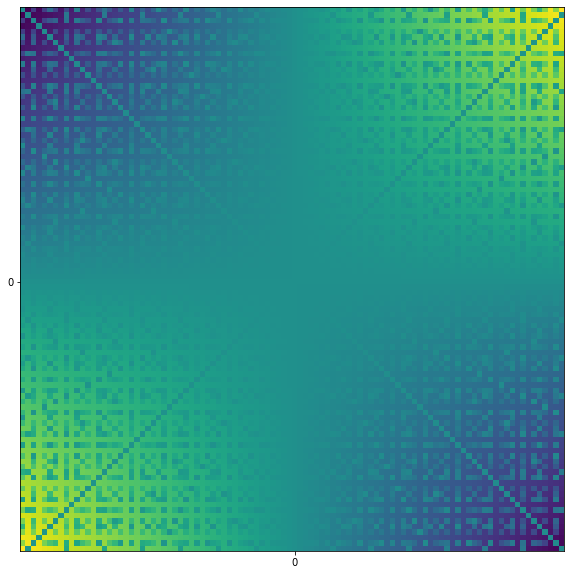

In [15]:
import math

tl,tr,bl,br = s.get_corners()

for x in range(tl[0],br[0]+1):
  for y in range(tl[1], br[1]-1, -1):
    s.set(x,y,(x*y)/(math.gcd(x,y)+1))

s.show()

# Decision region for all ReLU Neural Network

In [133]:
import torch

class allReLU(torch.nn.Module):
  def __init__(self):
    super(allReLU, self).__init__()
    
    
    self.hidden1 = torch.nn.Linear(in_features=2,out_features=3)
    self.activation1 = torch.nn.ReLU()
    self.hidden2 = torch.nn.Linear(3,5)
    self.activation2 = torch.nn.ReLU()
    self.hidden3 = torch.nn.Linear(5,7)
    self.activation3 = torch.nn.ReLU()
    self.hidden4 = torch.nn.Linear(7,4)
    self.activation4 = torch.nn.ReLU()
    self.hidden5 = torch.nn.Linear(4,6)
    self.activation5 = torch.nn.ReLU()
    self.hidden6 = torch.nn.Linear(6,3)
    self.activation6 = torch.nn.ReLU()
  
    self.output = torch.nn.Linear(3,out_features=1)
    self.final_activation = torch.nn.ReLU()
  
  def forward(self,x):
    h = self.hidden1(x)
    h = self.activation1(h)
    h = self.hidden2(h)
    h = self.activation2(h)
    h = self.hidden3(h)
    h = self.activation3(h)
    h = self.hidden4(h)
    h = self.activation4(h)
    h = self.hidden5(h)
    h = self.activation5(h)
    h = self.hidden6(h)
    h = self.activation6(h)
    
    h = self.output(h)
    h - self.final_activation(h)
    return h

model = allReLU()
print(model)

allReLU(
  (hidden1): Linear(in_features=2, out_features=3, bias=True)
  (activation1): ReLU()
  (hidden2): Linear(in_features=3, out_features=5, bias=True)
  (activation2): ReLU()
  (hidden3): Linear(in_features=5, out_features=7, bias=True)
  (activation3): ReLU()
  (hidden4): Linear(in_features=7, out_features=4, bias=True)
  (activation4): ReLU()
  (hidden5): Linear(in_features=4, out_features=6, bias=True)
  (activation5): ReLU()
  (hidden6): Linear(in_features=6, out_features=3, bias=True)
  (activation6): ReLU()
  (output): Linear(in_features=3, out_features=1, bias=True)
  (final_activation): ReLU()
)


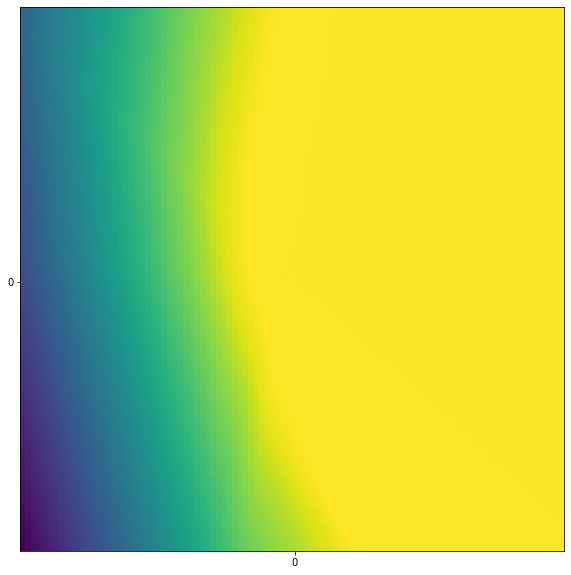

In [137]:
import math

model = allReLU()

s = CPlane(rows=100,cols=100)
tl,tr,bl,br = s.get_corners()

for x in range(tl[0],br[0]+1):
  for y in range(tl[1], br[1]-1, -1):
    pred = model.forward(torch.Tensor([x,y]))
    s.set(x,y,pred)

s.show(figsize=(10,10))

# Decision region for all sigmoid Neural Network

In [3]:
import torch

class allSigmoid(torch.nn.Module):
  def __init__(self):
    super(allSigmoid, self).__init__()
    
    
    self.hidden1 = torch.nn.Linear(in_features=2,out_features=3)
    self.activation1 = torch.nn.Sigmoid()
    self.hidden2 = torch.nn.Linear(3,5)
    self.activation2 = torch.nn.Sigmoid()
    self.hidden3 = torch.nn.Linear(5,7)
    self.activation3 = torch.nn.Sigmoid()
    self.hidden4 = torch.nn.Linear(7,4)
    self.activation4 = torch.nn.Sigmoid()
    self.hidden5 = torch.nn.Linear(4,6)
    self.activation5 = torch.nn.Sigmoid()
    self.hidden6 = torch.nn.Linear(6,3)
    self.activation6 = torch.nn.Sigmoid()
  
    self.output = torch.nn.Linear(3,out_features=1)
    self.final_activation = torch.nn.Sigmoid()
  
  def forward(self,x):
    h = self.hidden1(x)
    h = self.activation1(h)
    h = self.hidden2(h)
    h = self.activation2(h)
    h = self.hidden3(h)
    h = self.activation3(h)
    h = self.hidden4(h)
    h = self.activation4(h)
    h = self.hidden5(h)
    h = self.activation5(h)
    h = self.hidden6(h)
    h = self.activation6(h)
    
    h = self.output(h)
    h - self.final_activation(h)
    return h

model = allSigmoid()
print(model)

allSigmoid(
  (hidden1): Linear(in_features=2, out_features=3, bias=True)
  (activation1): Sigmoid()
  (hidden2): Linear(in_features=3, out_features=5, bias=True)
  (activation2): Sigmoid()
  (hidden3): Linear(in_features=5, out_features=7, bias=True)
  (activation3): Sigmoid()
  (hidden4): Linear(in_features=7, out_features=4, bias=True)
  (activation4): Sigmoid()
  (hidden5): Linear(in_features=4, out_features=6, bias=True)
  (activation5): Sigmoid()
  (hidden6): Linear(in_features=6, out_features=3, bias=True)
  (activation6): Sigmoid()
  (output): Linear(in_features=3, out_features=1, bias=True)
  (final_activation): Sigmoid()
)


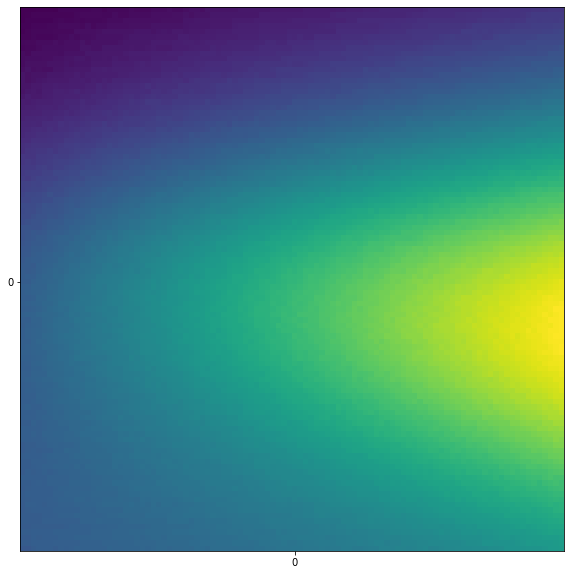

In [69]:
import math

model = allSigmoid()

LIMR = 100
LIMC = 100
newmin=-8
newmax=8

s = CPlane(rows=LIMR,cols=LIMC)
tl,tr,bl,br = s.get_corners()

for x in range(tl[0],br[0]+1):
  for y in range(tl[1], br[1]-1, -1):
    scaled_x = (x-tl[0])*(newmax-newmin)/(br[0]+1-tl[0])+newmin #scaling input between for sigmoid
    scaled_y = (y-tl[1])*(newmax-newmin)/(br[1]-1-tl[1])+newmin
    pred = model.forward(torch.Tensor([scaled_x,scaled_y]))
    s.set(x,y,pred)

s.show(figsize=(10,10))